<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [16]:
# importing required libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(os.getcwd() + "/who-life-expectancy-data.csv")
# selecting certain arbitrary features and renaming for sake of comfort
df = df.loc[:,['Adult Mortality', 'infant deaths', 'Measles ', 'Polio', ' HIV/AIDS', 'Schooling', 'GDP', 'under-five deaths ','Life expectancy ']]
df = df.rename(columns={
    'Adult Mortality':'adult_mortality',
    'Measles ':'measles',
    'Polio':'polio',
    ' HIV/AIDS':'hiv_aids',
    'Schooling':'schooling',
    'GDP':'gdp',
    'under_five deaths':'under_five_deaths',
    'Life expectancy ':'life_expectancy'
})
df.head()

,adult_mortality,infant deaths,measles,polio,hiv_aids,schooling,gdp,under-five deaths,life_expectancy
0,263.0,62,1154,6.0,0.1,10.1,584.259210,83,65.0
1,271.0,64,492,58.0,0.1,10.0,612.696514,86,59.9
2,268.0,66,430,62.0,0.1,9.9,631.744976,89,59.9
3,272.0,69,2787,67.0,0.1,9.8,669.959000,93,59.5
4,275.0,71,3013,68.0,0.1,9.5,63.537231,97,59.2


In [3]:
X = df.drop('life_expectancy', 1)
y = df['life_expectancy']

In [4]:
from sklearn.model_selection import train_test_split

# splitting our available data into a training set and a testing set, the latter to find out if
# training the model on our training set leads to overfitting or underfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test = X_test.dropna(axis=0)
X_train = X_train.dropna(axis=0)

In [5]:
from sklearn.preprocessing import StandardScaler

# normalizing our feature set to improve PCA analysis
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_output_train = pca.fit_transform(X_train)

In [7]:
explained_variance = pca.explained_variance_ratio_
pca_output_train[0]

array([-1.28458227,  0.87677062])

In [10]:
principal_df = pd.DataFrame(data=pca_output_train, columns=['component_one', 'component_two'])
principal_df.head()

,component_one,component_two
0,-1.284582,0.876771
1,1.200405,-1.217186
2,-0.777817,0.246031
3,-0.655572,-0.020190
4,-2.295842,1.898918


In [14]:
final_df = pd.concat([principal_df, df[['life_expectancy']]], axis=1)
final_df.head()

,component_one,component_two,life_expectancy
0,-1.284582,0.876771,65.0
1,1.200405,-1.217186,59.9
2,-0.777817,0.246031,59.9
3,-0.655572,-0.020190,59.5
4,-2.295842,1.898918,59.2


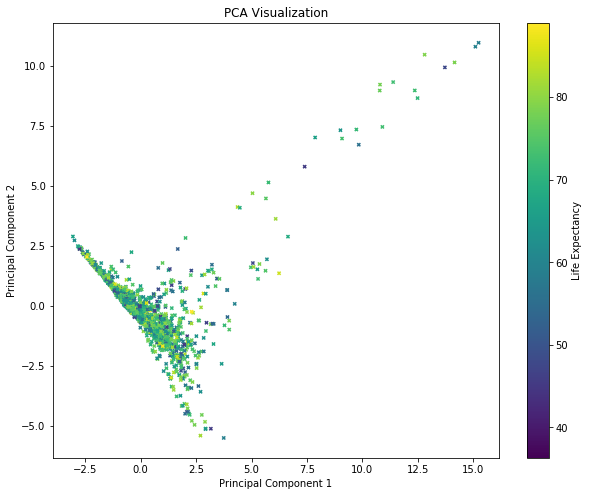

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(
    final_df.iloc[:, 0], 
    final_df.iloc[:,1], 
    marker='x', 
    c= final_df.life_expectancy,
    s=10
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
cbar = plt.colorbar()
cbar.set_label('Life Expectancy')